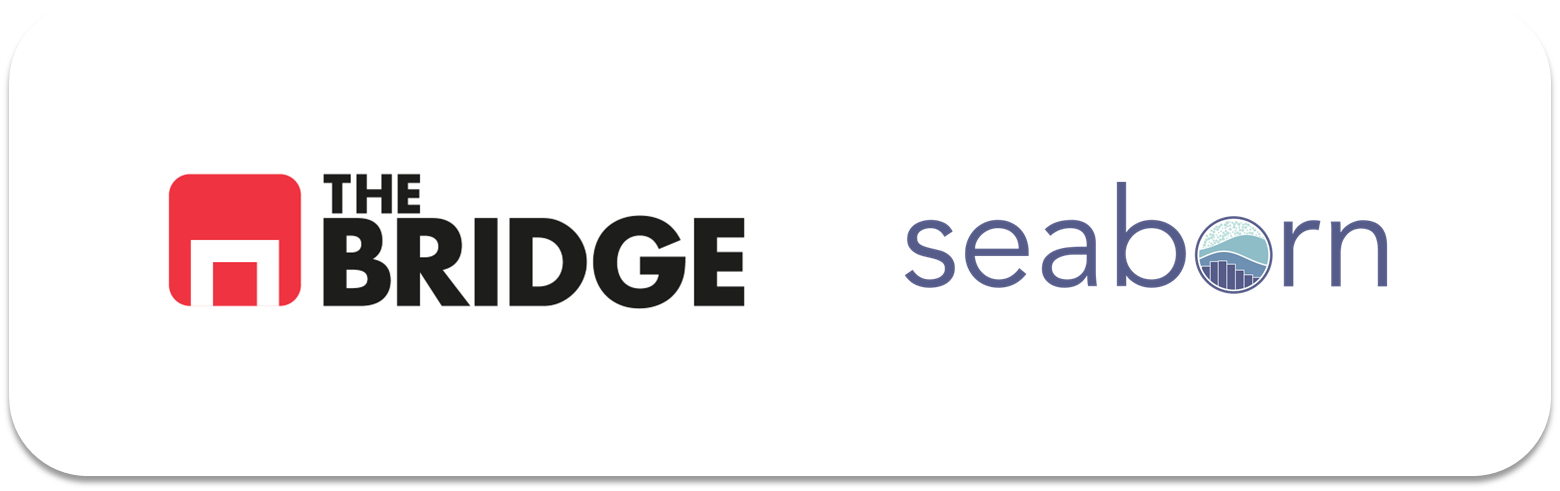

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [9]:
df_cities = pd.read_csv("./data/california_cities.csv")
df_cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [10]:
df_cities.isnull().sum()

Unnamed: 0             0
city                   0
latd                   0
longd                  0
elevation_m           48
elevation_ft          12
population_total       0
area_total_sq_mi       2
area_land_sq_mi        0
area_water_sq_mi       1
area_total_km2         5
area_land_km2          4
area_water_km2         4
area_water_percent     5
dtype: int64

In [11]:
df_cities = df_cities.dropna()
df_cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns

def scatter_avanzado(
    df,          # 1. DataFrame
    col_x,       # 2. Columna numérica para X
    col_y,       # 3. Columna numérica para Y
    col_cat=None,# 4. Columna categórica (opcional)
    size_val=50, # 5. Número o nombre de columna para tamaños
    scale=1,     # 6. Escala para tamaños cuando size_val es columna
    legend=True  # EXTRA: mostrar o no la leyenda
):
    fig, ax = plt.subplots(figsize=(7,5))

    # Tamaños
    if isinstance(size_val, (int, float)):
        sizes = size_val
        size_arg = None
    else:
        sizes = df[size_val] * scale
        size_arg = sizes 

    # Scatter
    sns.scatterplot(
        data=df,
        x=col_x,
        y=col_y,
        hue=col_cat,
        size=size_arg,
        palette="viridis",
        ax=ax
    )

    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)
    ax.set_title("Diagrama de dispersión avanzado")

    if not legend:
        ax.get_legend().remove()

    return fig, ax


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

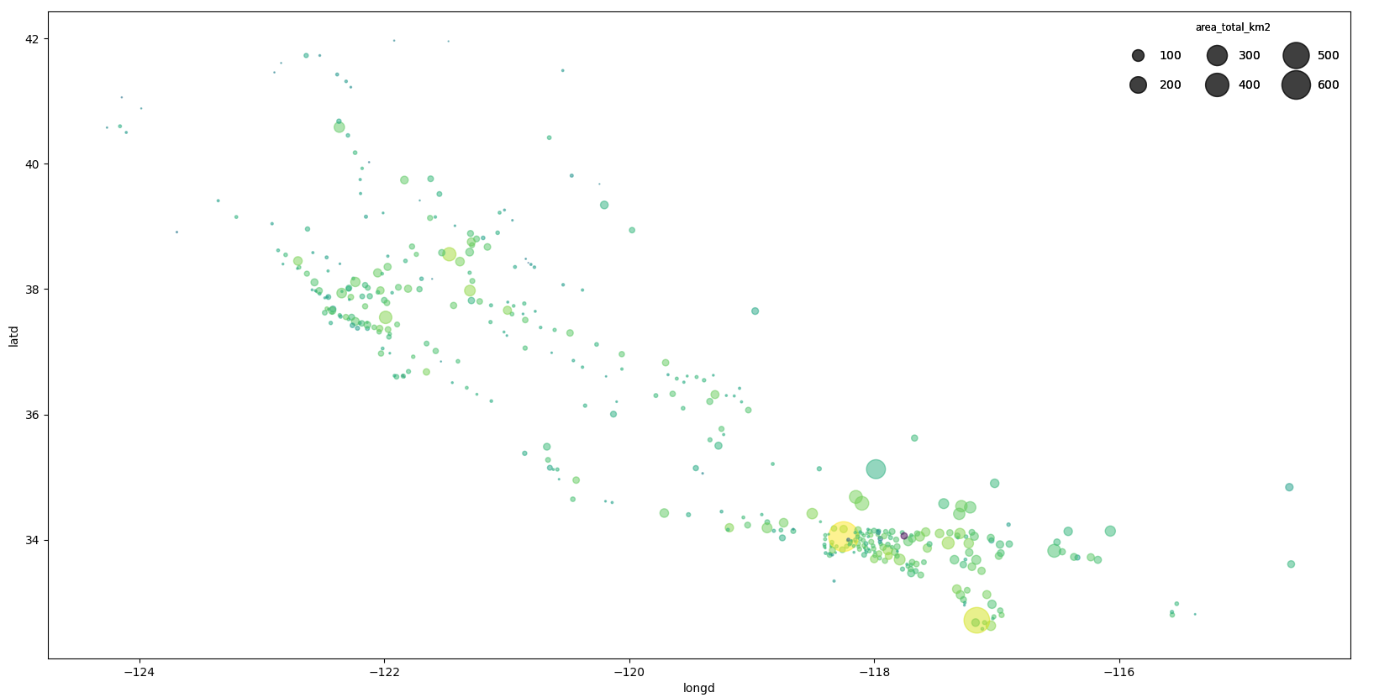

In [13]:
df = pd.read_csv("./data/california_cities.csv")

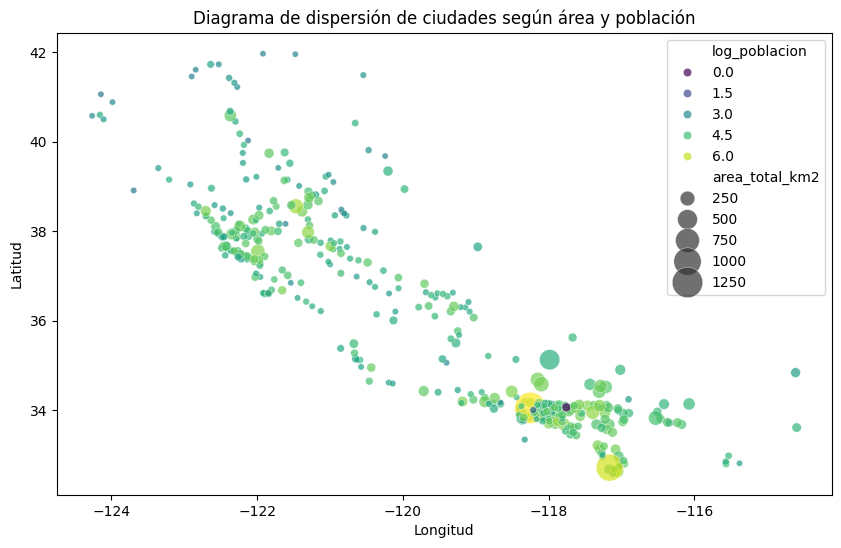

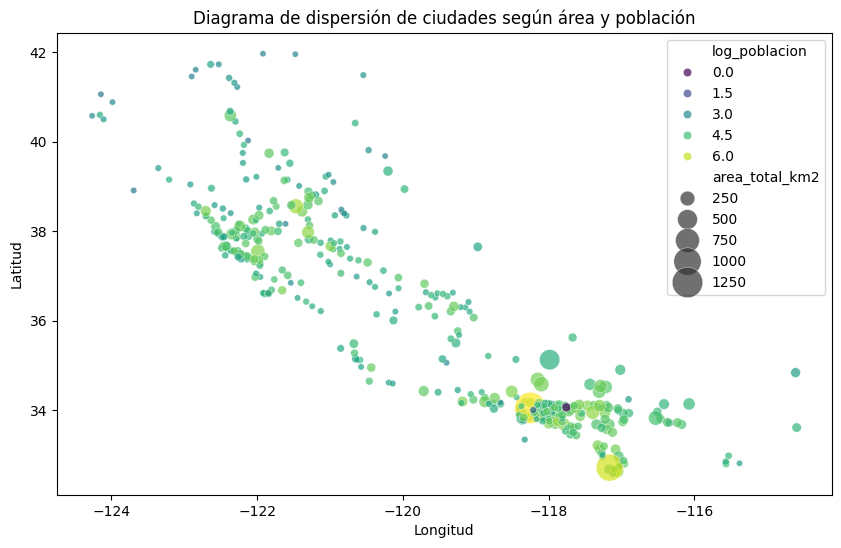

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Crear la columna con el logaritmo de la población

df_cities["log_poblacion"] = np.log10(df_cities["population_total"])

# 2) Crear figura
fig, ax = plt.subplots(figsize=(10,6))

# 3) Scatter
sns.scatterplot(
    data=df_cities,
    x="longd",
    y="latd",
    size="area_total_km2",      # tamaño de los puntos
    hue="log_poblacion",        # colores según log de población
    palette="viridis",          # colormap bonito
    sizes=(20, 500),            # rango de tamaños opcional
    alpha=0.7,
    ax=ax
)

# 4) Etiquetas bonitas
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.set_title("Diagrama de dispersión de ciudades según área y población")

# 5) (Opcional) que no moleste la leyenda de tamaños


fig

## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/titanic.csv")

sns.set(style="whitegrid")

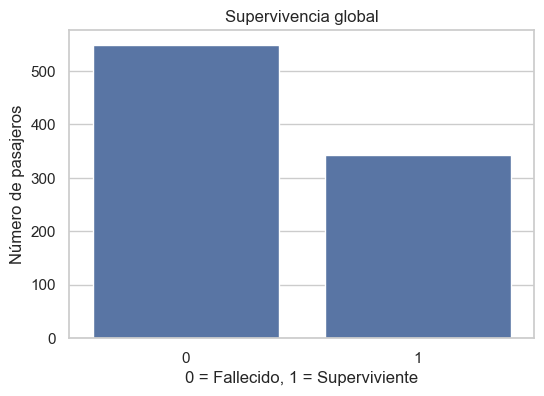

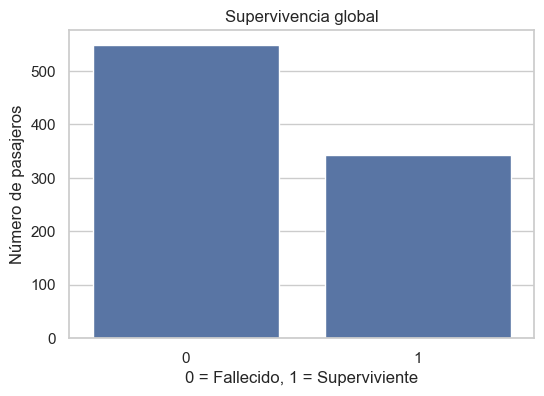

In [23]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data= df, x="survived", ax=ax)
ax.set_title("Supervivencia global")
ax.set_xlabel("0 = Fallecido, 1 = Superviviente")
ax.set_ylabel("Número de pasajeros")
fig

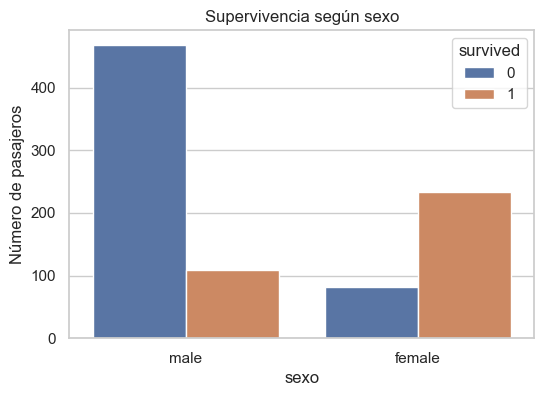

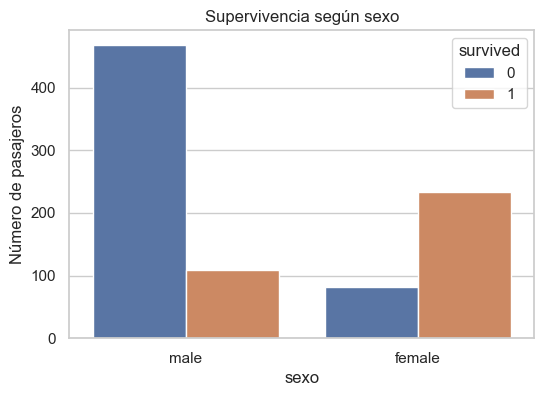

In [22]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x="sex", hue="survived", ax=ax)
ax.set_title("Supervivencia según sexo")
ax.set_xlabel("sexo")
ax.set_ylabel("Número de pasajeros")
fig


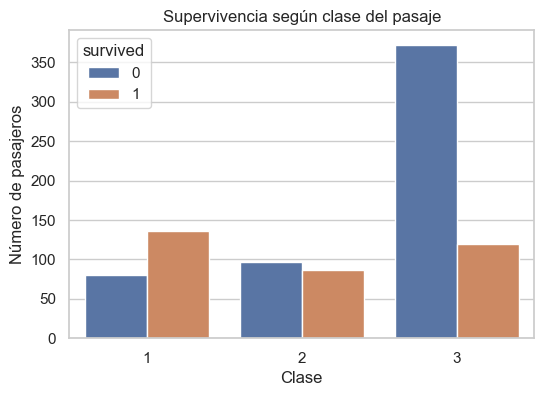

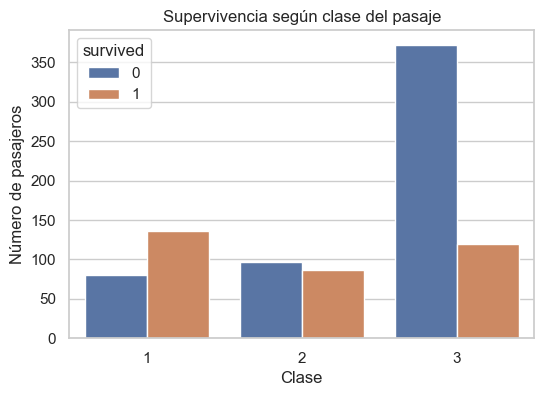

In [25]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x="pclass", hue="survived", ax=ax)
ax.set_title("Supervivencia según clase del pasaje")
ax.set_xlabel("Clase")
ax.set_ylabel("Número de pasajeros")
fig

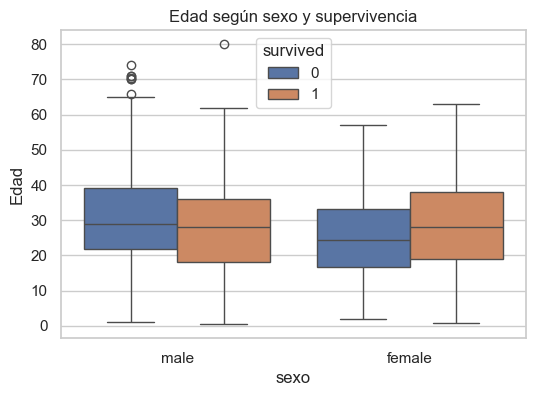

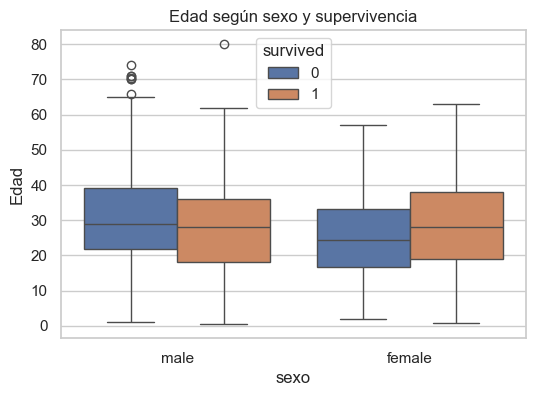

In [33]:

fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(data=df, x="sex", y="age", hue="survived", ax=ax)
ax.set_title("Edad según sexo y supervivencia")
ax.set_xlabel("sexo")
ax.set_ylabel("Edad")
fig

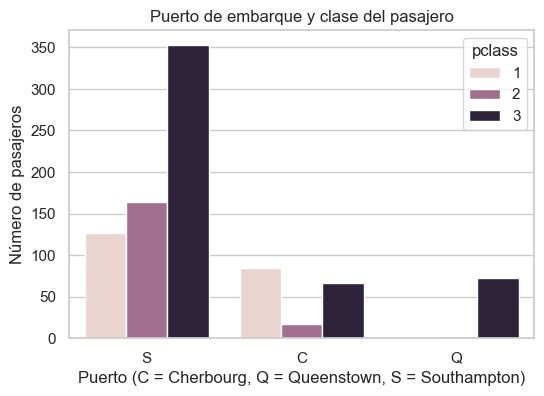

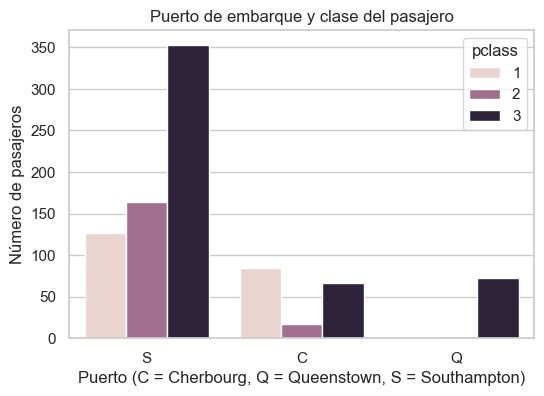

In [32]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x="embarked", hue="pclass", ax=ax)
ax.set_title("Puerto de embarque y clase del pasajero")
ax.set_xlabel("Puerto (C = Cherbourg, Q = Queenstown, S = Southampton)")
ax.set_ylabel("Número de pasajeros")
fig